In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/NSE-TATAGLOBAL.csv


# Importing Libraries 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
stock_data= pd.read_csv("../input/dataset/NSE-TATAGLOBAL.csv")
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
stock_data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [6]:
stock_data.shape

(2035, 8)

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
print(stock_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


In [9]:
print(stock_data.describe)

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [10]:
#select numeric columns from data 
stock_data_numeric= stock_data.select_dtypes(include=[np.number])
numeric_cols=stock_data_numeric.columns.values
print(numeric_cols)

['Open' 'High' 'Low' 'Last' 'Close' 'Total Trade Quantity'
 'Turnover (Lacs)']


In [11]:
#select non numeric data from dataset 
stock_data_non_numeric= stock_data.select_dtypes(exclude=[np.number])
non_numeric_cols= stock_data_non_numeric.columns.values
print(non_numeric_cols)

['Date']


# Now lets check missing data in dataset through heatmap

<AxesSubplot:>

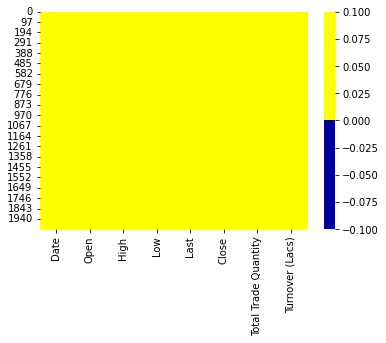

In [12]:
cols_hm=stock_data.columns[:30]
colours=['#000099','#ffff00']
sns.heatmap(stock_data[cols_hm].isnull(),cmap=sns.color_palette(colours))

**Finding missing values through percentage list ****

In [13]:
#missing values in dataset through percentage list 
for col in stock_data.columns:
    pct_missing=np.mean(stock_data[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

Date - 0%
Open - 0%
High - 0%
Low - 0%
Last - 0%
Close - 0%
Total Trade Quantity - 0%
Turnover (Lacs) - 0%


This shows that our data don't have missing values in it, since we dont have missing data in our dataset therefore we will not elimate any column or feature from dataset 

In [14]:
stock_data['Date'].unique()

array(['2018-09-28', '2018-09-27', '2018-09-26', ..., '2010-07-23',
       '2010-07-22', '2010-07-21'], dtype=object)

In [15]:
stock_data['Open'].unique()

array([234.05, 234.55, 240.  , ..., 118.3 , 117.3 , 120.3 ])

In [16]:
stock_data['High'].unique()

array([235.95, 236.8 , 240.  , ..., 121.7 , 121.95, 123.  ])

In [17]:
stock_data['Low'].unique()

array([230.2 , 231.1 , 232.5 , ..., 111.55, 113.8 , 117.2 ])

In [18]:
stock_data['Last'].unique()

array([233.5 , 233.8 , 235.  , ..., 112.05, 113.2 , 121.1 ])

In [19]:
stock_data['Close'].unique()

array([233.75, 233.25, 234.25, ..., 116.5 , 118.3 , 116.6 ])

In [20]:
stock_data['Total Trade Quantity'].unique()

array([3069914, 5082859, 2240909, ...,  281312,  293312,  658666])

In [21]:
stock_data['Turnover (Lacs)'].unique()

array([ 7162.35, 11859.95,  5248.6 , ...,   340.31,   355.17,   803.56])

# Exploratory Data Analysis 

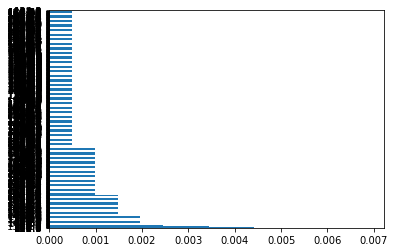

In [22]:
##lets calculate the percentage of High category 
stock_data.High.value_counts(normalize=True)

#plot the graph of perctanges of High category 
stock_data.High.value_counts(normalize=True).plot.barh()
plt.show()

In [23]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

**Since we know that we can't use column names with space in between them to plot various graphs therefore we have renamed them to visualize them better.**

In [24]:
stock_data.columns=['Date','Open','High','Low','Last','Close','Total_Trade_Quantity','Turnover_Lacs']
stock_data.head(5)

,Date,Open,High,Low,Last,Close,Total_Trade_Quantity,Turnover_Lacs
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


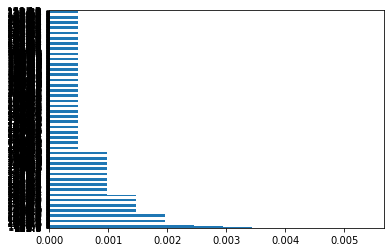

In [25]:
##lets calculate the percentage of Low category 
stock_data.Low.value_counts(normalize=True)

#plot the graph of perctanges of Low category 
stock_data.Low.value_counts(normalize=True).plot.barh()
plt.show()

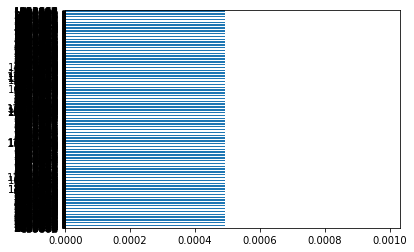

In [26]:
#lets calculate the percentage of each Total_Trade_Quantity Category 
stock_data.Total_Trade_Quantity.value_counts(normalize=True)

#plot the graph of percentages of Total_Trade_Quantity category 
stock_data.Total_Trade_Quantity.value_counts(normalize=True).plot.barh()
plt.show()

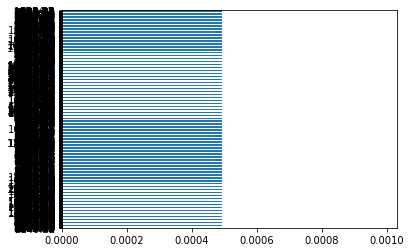

In [27]:
#lets calculate the percentage of each Turnover_Lacs
stock_data.Turnover_Lacs.value_counts(normalize=True)

#plot the graph of percentages of Turnover_Lacs category
stock_data.Turnover_Lacs.value_counts(normalize=True).plot.barh()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

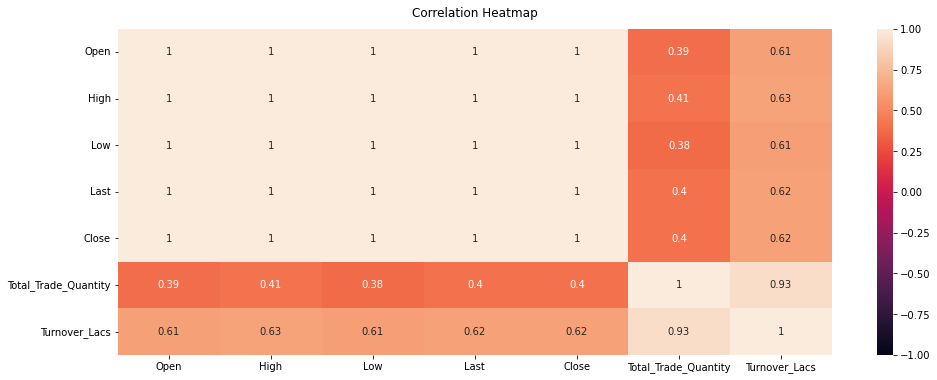

In [28]:
plt.figure(figsize=(16,6))
#storing heatmap object in a variable to easily access it whenever required to include more features (such as title )
#set the range of values to be displayed on the colormap from -1 to 1 and set the annotatio to true to display correlation values to heatmap 
heatmap=sns.heatmap(stock_data.corr(),vmin=-1,vmax=1,annot=True)
#giving title to the heatmap 
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':12},pad=12)

Text(0.5, 1.0, 'Features correlating with Total_Trade_Quantity')

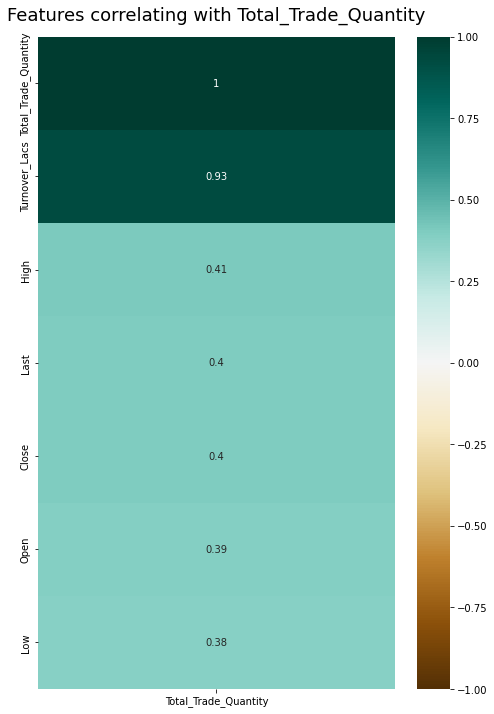

In [29]:
#featuring correlating with Total_Trade_Quantity
plt.figure(figsize=(8,12))
heatmap=sns.heatmap(stock_data.corr()[['Total_Trade_Quantity']].sort_values(by='Total_Trade_Quantity',ascending=False),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Features correlating with Total_Trade_Quantity',fontdict={'fontsize':18},pad=16)

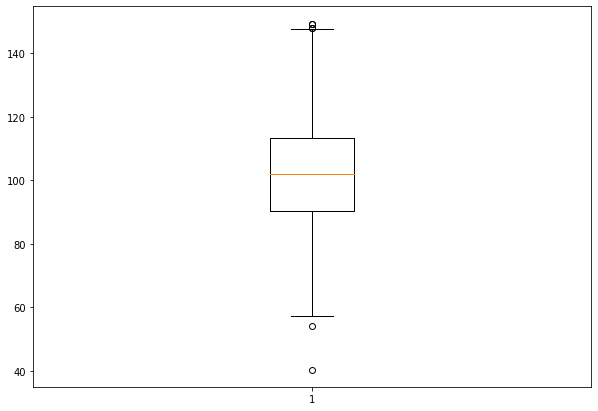

In [30]:
import matplotlib.pyplot as plt 
import numpy as np 

#creating dataset
np.random.seed(10)
stock_data=np.random.normal(100,20,200)

fig=plt.figure(figsize=(10,7))
plt.boxplot(stock_data)
plt.show()

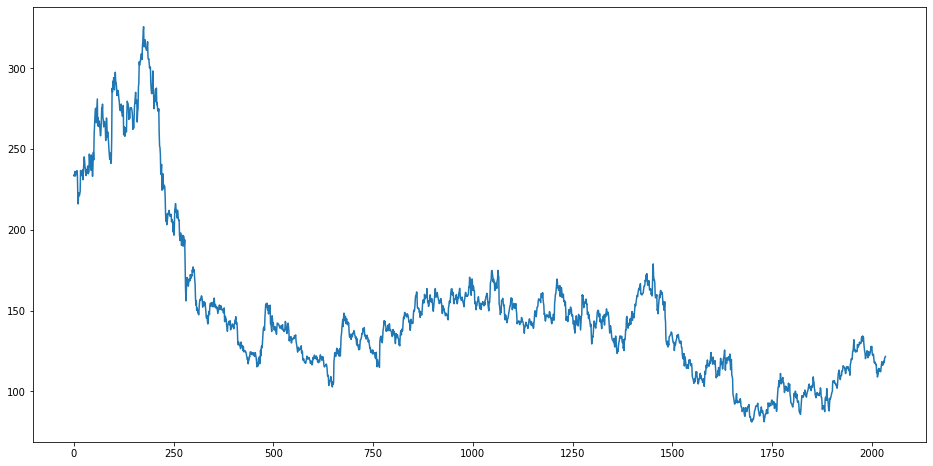

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
df= pd.read_csv("../input/dataset/NSE-TATAGLOBAL.csv")
#we are considering close column as target variable 
#first we will set index as date
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
#df.index=df['Date']

#plotting of graph 
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price History')


we will now plot the graph to predict the estimated values and its accurate values 

In [32]:
!pip install -U Tensorflow 

     |████████████████████████████████| 458.3 MB 9.3 kB/s 
     |████████████████████████████████| 462 kB 64.7 MB/s 
     |████████████████████████████████| 4.3 MB 58.4 MB/s 
     |████████████████████████████████| 4.0 MB 62.3 MB/s 
     |████████████████████████████████| 1.3 MB 60.5 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=2c288b7e56a551c86baa5da767c93427a9281b8a497ec09c14b77dea16c5f8ff
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successfully built clang
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2

In [33]:
from pandas_datareader import data
import matplotlib.pyplot as plt 
import pandas as pd 
import datetime as dt
import urllib.request , json 
import os 
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

2021-09-24 19:13:42.069068: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-24 19:13:42.069635: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [34]:
df=df.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


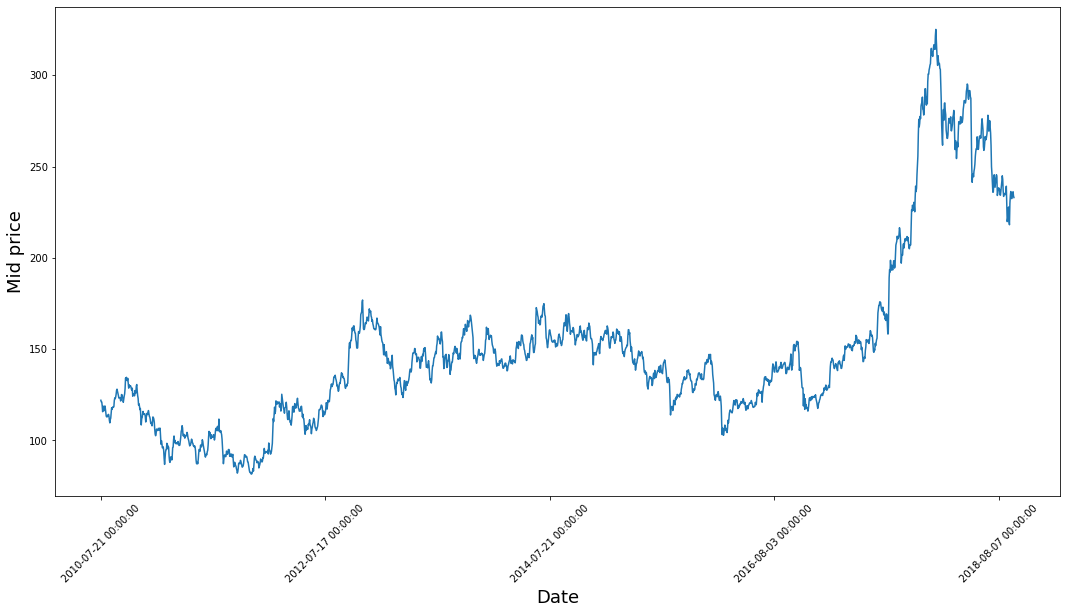

In [35]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid price',fontsize=18)
plt.show()

In [36]:
df1=df.reset_index()['Close']
print(df1)

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64


as we know that close is our target column therefore we will plot the graph against it 


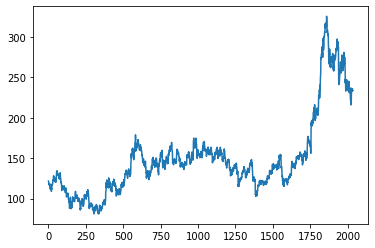

In [37]:
plt.plot(df1)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [39]:
#now we will print df1 and check the transformation 
print(df1)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


# Splitting dataset into test and train dataset 

In [40]:
train_size=int(len(df1)*(0.65))
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [41]:
train_size,test_size

(1322, 713)

In [42]:
import numpy 
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        return numpy.array(dataX),numpy.array(dataY)

In [43]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data,time_step)

In [44]:
print(X_train.shape),print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [45]:
print(X_test.shape),print(ytest.shape)

(1, 100)
(1,)


(None, None)

In [46]:
#reshape input to be [samples ,time steps,features] which is required for LSTM 
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [47]:
## creating stacked LSTM model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [48]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

2021-09-24 19:13:55.612634: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-24 19:13:55.612689: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-24 19:13:55.612718: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5a416f77c3e2): /proc/driver/nvidia/version does not exist
2021-09-24 19:13:55.614588: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

2021-09-24 19:13:58.274791: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.0171 - val_loss: 0.0186
Epoch 2/100
1/1 [==============================] - 0s 142ms/step - loss: 0.0099 - val_loss: 0.0106
Epoch 3/100
1/1 [==============================] - 0s 146ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 4/100
1/1 [==============================] - 0s 142ms/step - loss: 6.8699e-04 - val_loss: 4.3004e-04
Epoch 5/100
1/1 [==============================] - 0s 149ms/step - loss: 4.0951e-04 - val_loss: 9.4446e-05
Epoch 6/100
1/1 [==============================] - 0s 153ms/step - loss: 0.0027 - val_loss: 8.8628e-05
Epoch 7/100
1/1 [==============================] - 0s 144ms/step - loss: 0.0026 - val_loss: 2.1858e-05
Epoch 8/100
1/1 [==============================] - 0s 134ms/step - loss: 0.0012 - val_loss: 4.8104e-04
Epoch 9/100
1/1 [==============================] - 0s 142ms/step - loss: 2.6113e-04 - val_loss: 0.0014
Epoch 10/100
1/1 [==============================] - 0s 139ms/step - loss: 2.1681

In [52]:
import tensorflow as tf

In [53]:
tf.__version__

'2.6.0'

# Prediction and performance metrics

In [54]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [55]:
#transform back to original form 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [56]:
#calculate RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

110.897066153732

In [57]:
#test data RMSE 
math.sqrt(mean_squared_error(y_train,train_predict))

110.897066153732

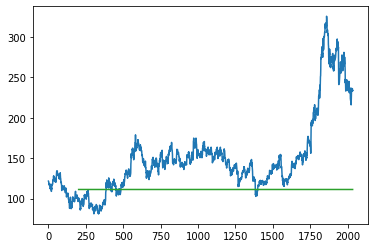

In [58]:
##shifting train production for plotting 
look_back=100
trainPredictPlot= numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test predictions for plotting 
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and predictions 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [59]:
len(test_data)

713

In [60]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [61]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [62]:
temp_input

[0.28431372549019607,
 0.289828431372549,
 0.29289215686274506,
 0.29452614379084974,
 0.28451797385620914,
 0.28594771241830064,
 0.29595588235294124,
 0.2892156862745098,
 0.284109477124183,
 0.2798202614379084,
 0.27450980392156865,
 0.28288398692810457,
 0.29084967320261434,
 0.28737745098039225,
 0.29003267973856206,
 0.2890114379084967,
 0.2973856209150326,
 0.2906454248366013,
 0.2947303921568627,
 0.31352124183006536,
 0.3073937908496731,
 0.3039215686274509,
 0.29146241830065367,
 0.292687908496732,
 0.29861111111111116,
 0.3018790849673202,
 0.298406862745098,
 0.29289215686274506,
 0.30085784313725483,
 0.3002450980392156,
 0.29370915032679734,
 0.2718545751633987,
 0.2800245098039216,
 0.27308006535947715,
 0.2606209150326797,
 0.24816176470588225,
 0.2536764705882353,
 0.26940359477124187,
 0.26327614379084974,
 0.26388888888888895,
 0.27961601307189543,
 0.2918709150326797,
 0.3018790849673202,
 0.30228758169934633,
 0.29432189542483655,
 0.3047385620915033,
 0.3008578431

# Demonstrate prediction for next 10 years

In [63]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,371,1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.28982843 0.29289216 0.29452614 0.28451797 0.28594771 0.29595588
 0.28921569 0.28410948 0.27982026 0.2745098  0.28288399 0.29084967
 0.28737745 0.29003268 0.28901144 0.29738562 0.29064542 0.29473039
 0.31352124 0.30739379 0.30392157 0.29146242 0.29268791 0.29861111
 0.30187908 0.29840686 0.29289216 0.30085784 0.3002451  0.29370915
 0.27185458 0.28002451 0.27308007 0.26062092 0.24816176 0.25367647
 0.26940359 0.26327614 0.26388889 0.27961601 0.29187092 0.30187908
 0.30228758 0.2943219  0.30473856 0.30085784 0.30004085 0.29064542
 0.30841503 0.31658497 0.3192402  0.31556373 0.30821078 0.31004902
 0.30984477 0.30147059 0.28676471 0.27124183 0.27859477 0.27593954
 0.28472222 0.28860294 0.28227124 0.30718954 0.29575163 0.31372549
 0.3496732  0.36172386 0.37908497 0.38582516 0.3809232  0.39236111
 0.37908497 0.38480392 0.3690768  0.37275327 0.36376634 0.36846405
 0.37275327 0.35723039 0.36029412 0.3619281  0.35355392 0.34375
 0.3500817  0.34926471 0.36560458 0.34742647 0.331495